In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier     #KNN
from sklearn.linear_model import LogisticRegression    #Logistic Regression
from sklearn.tree import DecisionTreeClassifier        #Decision Tree
from sklearn.ensemble import RandomForestClassifier    #Random Forest
from sklearn.neural_network import MLPClassifier       #Neural Network
from sklearn.svm import SVC                            #SVM
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import export_graphviz
import matplotlib.pylab as plt
import numpy as np
import graphviz


#load the breast cancer data from sklearn and display the description of dataset
cancer = load_breast_cancer()
# print(cancer.DESCR)
print(cancer.feature_names)
# print(cancer.target_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


Accuracy of the training set for 6NN: 0.946009
Accuracy of the test set for 6NN: 0.937063


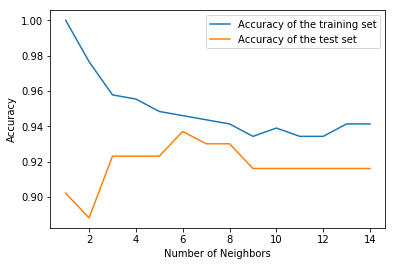

In [8]:
# ----------KNN Classifier
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []

# try KNN for diffrent k nearest neighbor from 1 to 15
neighbors_setting = range(1, 15)

for n_neighbors in neighbors_setting:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    training_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))

plt.plot(neighbors_setting, training_accuracy, label='Accuracy of the training set')
plt.plot(neighbors_setting, test_accuracy, label='Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.legend()

print("Accuracy of the training set for 6NN: {:3f}".format(training_accuracy[5]))
print("Accuracy of the test set for 6NN: {:3f}".format(test_accuracy[5]))
# From the plot can observe the neighbor 6 has best result

In [13]:
print("Accuracy of the training set for 6NN: {:3f}".format(training_accuracy[5]))
print("Accuracy of the test set for 6NN: {:3f}".format(test_accuracy[5]))

Accuracy of the training set for 6NN: 0.946009
Accuracy of the test set for 6NN: 0.937063


In [9]:
#----------------Logistic Regression(classification)-------------------#
#----binary classification (tumor: benign, malignant)--------#
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)


print('Accuracy on the training set: {:.3f}'.format(log_reg.score(X_train,y_train)))
print('Accuracy on the training set: {:.3f}'.format(log_reg.score(X_test,y_test)))

#It seems as it does better than KNN

Accuracy on the training set: 0.953
Accuracy on the training set: 0.958


In [14]:
#Regularization: prevention of overfitting 
log_reg100 = LogisticRegression(C=100)
log_reg100.fit(X_train, y_train)
print('Accuracy on the training set after regularization: {:.3f}'.format(log_reg100.score(X_train, y_train)))
print('Accuracy on the test set after regularization: {:.3f}'.format(log_reg100.score(X_test, y_test)))

Accuracy on the training set after regularization: 0.972
Accuracy on the test set after regularization: 0.965


Accuracy on the training set: 0.972
Accuracy on the training set: 0.958


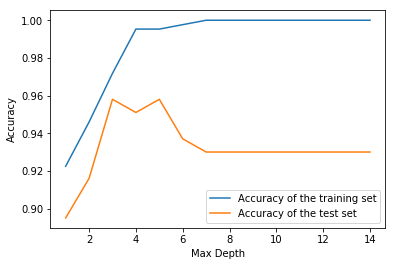

In [18]:
#----------------- Decision Tree
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=42)

Tree_training_accuracy = []
Tree_test_accuracy = []

max_dep = range(1,15)

for md in max_dep:
    tree = DecisionTreeClassifier(max_depth=md,random_state=0)
    tree.fit(X_train,y_train)
    Tree_training_accuracy.append(tree.score(X_train, y_train))
    Tree_test_accuracy.append(tree.score(X_test, y_test))
 
plt.plot(max_dep,Tree_training_accuracy, label='Accuracy of the training set')
plt.plot(neighbors_setting,Tree_test_accuracy, label='Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('Max Depth')
plt.legend()

# By having larger max_depth (>5), we overfit the model into training data, so the accuracy for training set become 
# but the accuracy for test set decrease


# by looking at plot, best result accurs when max_depth is 3
print('Accuracy on the training set: {:.3f}'.format(Tree_training_accuracy[2]))
print('Accuracy on the training set: {:.3f}'.format(Tree_test_accuracy[2]))

#This result is similar with the logistic regression
#This method do not need to pre-process data and standard features
#Disadvantage is easy to be overfitting

In [16]:
print('Feature importances: {}'.format(tree.feature_importances_))
type(tree.feature_importances_)

Feature importances: [0.         0.         0.         0.         0.         0.
 0.         0.72468105 0.         0.         0.01277192 0.
 0.         0.         0.00826156 0.         0.         0.01702539
 0.         0.         0.05899273 0.12550655 0.00838371 0.03452044
 0.00985664 0.         0.         0.         0.         0.        ]


numpy.ndarray

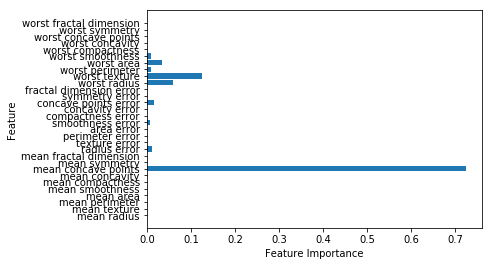

In [17]:
#Feature Importance
n_feature = cancer.data.shape[1]
plt.barh(range(n_feature), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_feature), cancer.feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

In [19]:
# ---------------- Random Forests
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train,y_train)

#you can tune parameter such as:
# - n_job (how many cores)(n_job=-1 => all cores)
# - max_depth
# - max_feature


print('Accuracy on training set data: {:.3f}'.format(forest.score(X_train,y_train)))
print('Accuracy on test set data: {:.3f}'.format(forest.score(X_test,y_test)))

acc for training data: 1.000
acc for test data: 0.972


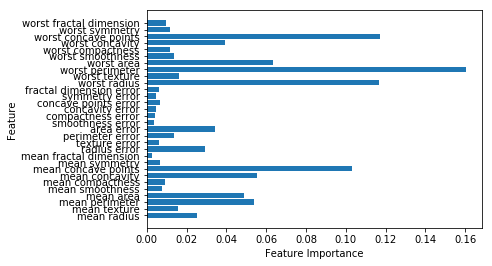

In [20]:
#Feature Importance
n_feature = cancer.data.shape[1]
plt.barh(range(n_feature), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_feature), cancer.feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

Accuracy on training data: 0.988
Accuracy on test data: 0.972


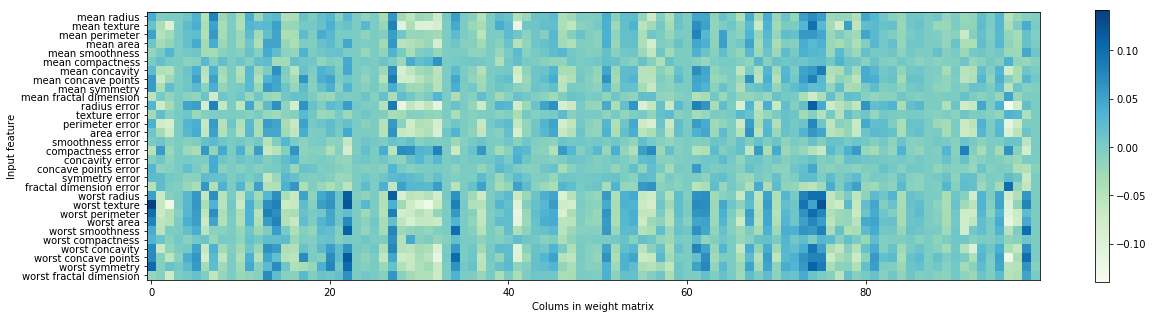

In [23]:
# ------------- Neural Network
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit(X_train).transform(X_train)
X_test_scaled = scaler.fit(X_test).transform(X_test)
mlp.fit(X_train_scaled,y_train)
plt.figure(figsize=(20,5))
plt.imshow(mlp.coefs_[0],interpolation='None',cmap='GnBu')
plt.yticks(range(30),cancer.feature_names)
plt.xlabel('Colums in weight matrix')
plt.ylabel('Input feature')
plt.colorbar()
print('Accuracy on training data: {:.3f}'.format(mlp.score(X_train_scaled, y_train)))
print('Accuracy on test data: {:.3f}'.format(mlp.score(X_test_scaled, y_test)))
# NN can get better result in larger datasets
# we can tune a lot of parameter
# but data may need pre-processing

In [32]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)


min_train = X_train.min(axis=0)
range_train = (X_train - min_train).max(axis=0)

X_train_scaled = (X_train - min_train)/range_train
X_test_scaled = (X_test - min_train)/range_train

svm = SVC(C=1000)
svm.fit(X_train_scaled, y_train)
print('The accuracy on the training subset: {:.3f}'.format(svm.score(X_train_scaled, y_train)))
print('The accuracy on the test subset: {:.3f}'.format(svm.score(X_test_scaled, y_test)))
#can work well on high-dimensional data with relatively small sample size
#don't perform well on high-dimensional data with many samples (i.e. > 100k)
#preprocessing may be required => implies knowledge and understanding of hyper-parameters
#harder to inspect and visualize

The accuracy on the training subset: 0.988
The accuracy on the test subset: 0.972
